In [1]:
import one_shot_svd
import pdb

In [2]:
from matplotlib import pyplot as plt
%debug
# # metaman = one_shot_svd.load_metaman("/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv")
# pdb.set_trace()
# # shiftsmat = one_shot_svd.interpolate_shifts(metaman, (800,1280), (640,1024))
# metamat = one_shot_svd.make_mastermat("/home/dshteinbok/nV3_PSFs_flat", "/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv", 
#                                           (800,1280), (640,1024))

ERROR:root:No traceback has been produced, nothing to debug.


In [9]:
pdb.set_trace()
# h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs", "/home/dshteinbok/nV3_PSFs_meta/PSF_Shifts.csv", 
#                                          (800,1280), (640,1024))
# h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs_large", "/home/dshteinbok/nV3_PSFs_meta/PSF_Shifts.csv", 
#                                           (800,1280), (640,1024))
h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs_flat", "/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv", 
                                          (800,1280), (640,1024))
# one_shot_svd.generate_and_save("/home/dshteinbok/nV3_PSFs_flat", "/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv", 
#                                           (800,1280), (640,1024), "../data/nV3_flat_h.mat", "../data/nV3_flat_weights.mat")
# one_shot_svd.save_generated(h, weights, "../data/nV3_flat_h.mat", "../data/nV3_flat_weights.mat")

--Return--
None
> /tmp/ipykernel_110268/1185775709.py(1)<cell line: 1>()
----> 1 pdb.set_trace()
      2 # h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs", "/home/dshteinbok/nV3_PSFs_meta/PSF_Shifts.csv",
      3 #                                          (800,1280), (640,1024))
      4 # h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs_large", "/home/dshteinbok/nV3_PSFs_meta/PSF_Shifts.csv",
      5 #                                           (800,1280), (640,1024))

ipdb> c
creating matrix

done

starting svd...

check values of ymat
interpolating...

done




In [10]:
one_shot_svd.save_generated(h, weights, "../data/nV3_flat_h_shifted.mat", "../data/nV3_flat_weights_shifted.mat")

In [4]:
import numpy as np
bad_psf = np.sum(weights[0,0,:]*h, -1)

In [5]:
%debug
h_small, weights_small = one_shot_svd.generate_unpadded("/home/dshteinbok/nV3_PSFs_flat", "/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv", 
                                          (800,1280), (640,1024))

ERROR:root:No traceback has been produced, nothing to debug.

KeyboardInterrupt



In [ ]:
%time
h_small.ravel().unravel

In [ ]:
weights_small.shape

In [ ]:
weights[0,0,:]

In [ ]:
%time
rectified_bad_psf_np = (bad_psf >= 0.001)*bad_psf

In [ ]:
# total number of pixels
P = 1280*800
P

In [ ]:
# total number of nonzero values in mastermat
NNZ = 57*P
NNZ

In [ ]:
bad_psf.dtype

In [ ]:
# total number of information in mastermat, if it is stored as CSR matrix, in bytes, 
# assuming COL_INDEX and ROW_INDEX take 8 bytes each per value
8*(2*NNZ + P + 1)

In [ ]:
raveled_psf = np.ravel(bad_psf)

In [ ]:
%time
np.arange(P)[raveled_psf >= 0.001]

In [ ]:
# just for fun, is it feasible to have a list of a hundred million entries in python?
megalist = []
for i in range(100000000):
    megalist.append(i)

In [ ]:
import sys
sys.getsizeof(megalist)

In [ ]:
%time
bad_psf = np.sum(weights[0,0,:]*h, -1)

In [ ]:
weights.shape

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# plt.imshow(np.sum(weights[0,0,:]*h, -1)[350:450,600:700])
# plt.imshow(np.sum(weights[0,0,:]*h, -1))

In [ ]:
plt.imshow(np.sum(h_small*weights_small[700,1180,:], -1))

In [ ]:
weights_small.shape

Read image in:             6530343
Resized image in:            10530189
image has 3 channels. Converting to grayscale.
Converted to grayscalse in:            14429856
Simulated in:                 551


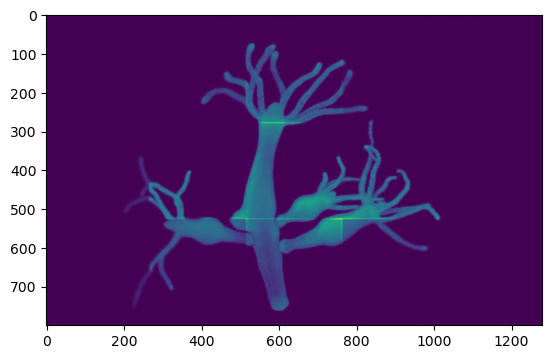

In [11]:
import sys
sys.path.append("../tensorflow")
import simulator

# flatsim = simulator.ImageSimulator("../data/nV3_flat_h.mat", "../data/nV3_flat_weights.mat")
flatsim = simulator.ImageSimulator("../data/nV3_flat_h_shifted.mat", "../data/nV3_flat_weights_shifted.mat")
_, sim = flatsim.simulate("../data/hydra3.jpg", my_simulation=False)
plt.imshow(sim)

Read image in:            13332982
Resized image in:              171205
Converted to grayscalse in:                 671
Simulated in:                 251


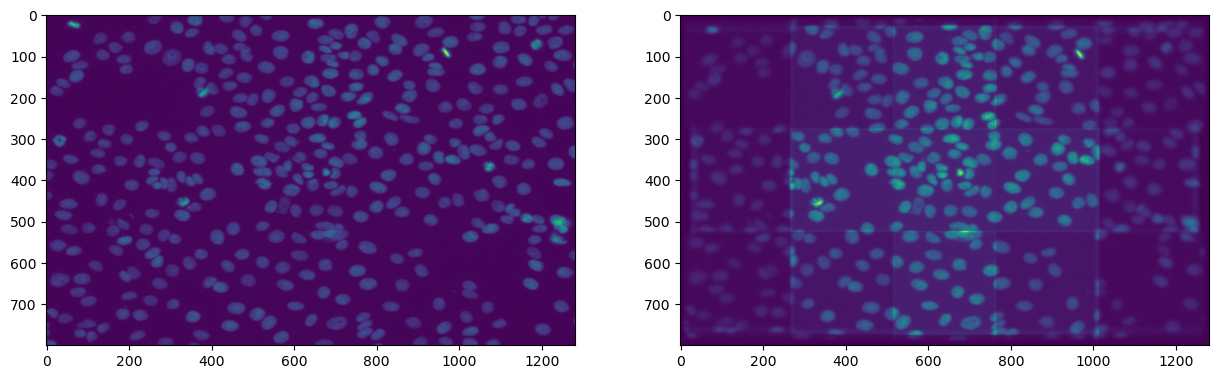

In [12]:
# img_resized = imageio.imread("../data/nV3_resized/1.png")
img, sim = flatsim.simulate("../data/nV3_resized/1.png", my_simulation=False)
fig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(img)
axs[1].imshow(sim)

In [ ]:
# examine each of the PSFs

# load the metaman for meaningful plot titles (the supposed locations)
import load_PSFs
metaman = load_PSFs.MetaMan("/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv")
fig, axs = plt.subplots(5,5, figsize=(15,15))
for row in range(5):
    for column in range(5):
        index = row*5 + column
        axs[row,column].imshow(np.sum(weights[metaman.shifts[index+1][1],metaman.shifts[index+1][0],:]*h, -1)[350:450,600:700])
        axs[row, column].set_title(metaman.shifts[index+1])

In [ ]:
img, sim = flatsim.simulate('/home/dshteinbok/TrainingData/Ground_truth_downsampled/1.png', my_simulation=False)
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img)
axs[1].imshow(sim)